# Definição do probelma de negócio

Usando dados históricos de vendas ao longo de 2023, seria possível prever o total de vendas em Janeiro/24?

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [8]:
dataFrame = pd.read_csv('dataset.csv')

In [9]:
dataFrame.shape

(365, 2)

In [10]:
dataFrame.columns

Index(['Data', 'Total_Vendas'], dtype='object')

In [4]:
dataFrame.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [5]:
dataFrame.describe()

,Total_Vendas
count,365.000000
mean,59.152472
std,10.056436
min,33.265284
25%,51.496725
50%,59.165362
75%,66.610772
max,84.430251


## Pré processamento dos dados

In [11]:
dataFrame['Data'].min()

'2023-01-01'

In [12]:
dataFrame['Data'].max()

'2023-12-31'

In [13]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [15]:
#Convertendo coluna 'Data' para methodo datetime
dataFrame['Data'] = pd.to_datetime(dataFrame['Data'])

In [16]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [17]:
# Converter em uma série temporal com data como indicie
serie_temporal = dataFrame.set_index('Data')['Total_Vendas']

In [18]:
type(serie_temporal)

pandas.core.series.Series

In [19]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [27]:
# Fornece a frequencia da série temporal (diária, neste caso)
serie_temporal = serie_temporal.asfreq('D')

In [28]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

## Análise exploratória

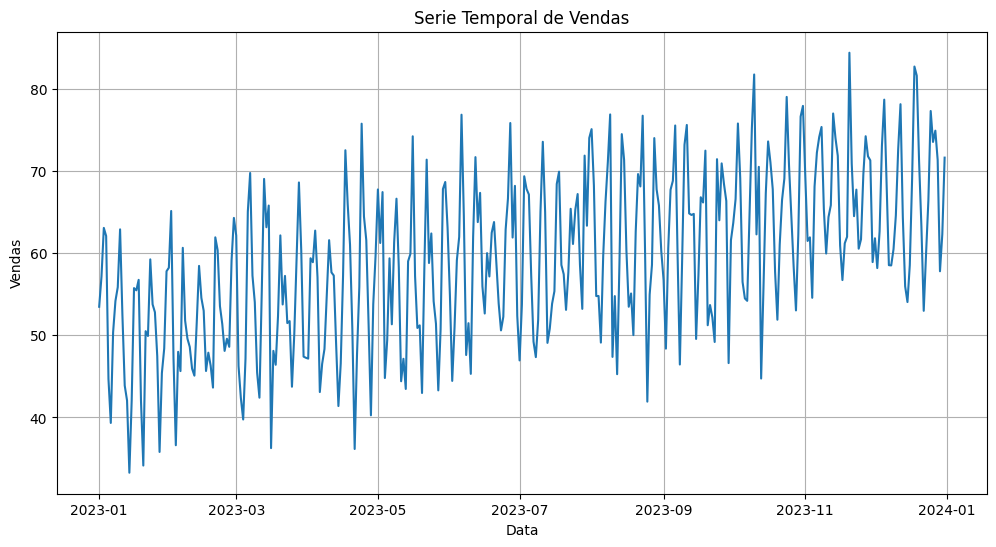

In [29]:
# gráfico sem formatação
plt.figure(figsize = (12,6))
plt.plot(serie_temporal)
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Serie Temporal de Vendas')
plt.grid(True)
plt.show()

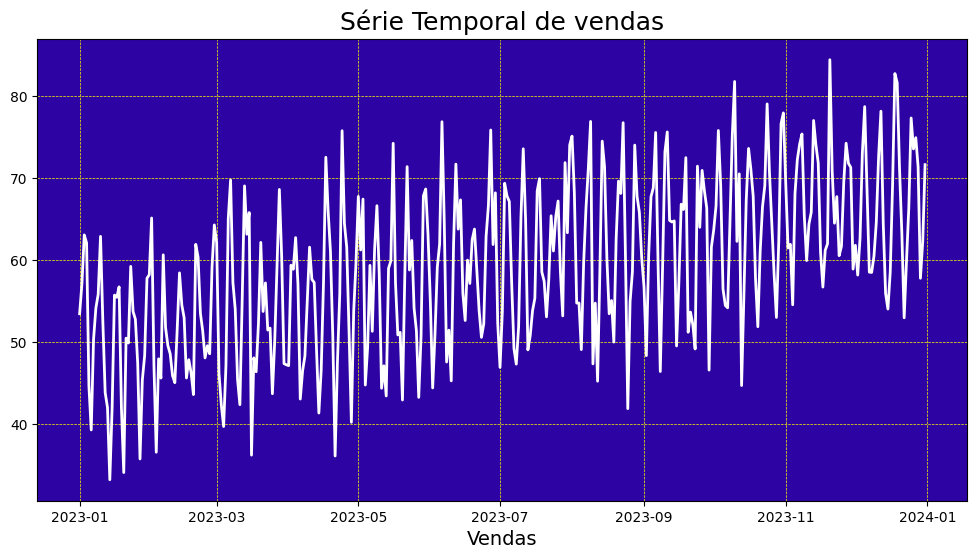

In [30]:
# Gráfico de serie temporal com formatação

plt.figure(figsize = (12,6))
plt.plot(serie_temporal, color = "white", linewidth = 2)

#configura cores e estilo
plt.gca().set_facecolor('#2e03a3')
plt.grid(color = 'yellow', linestyle = '--', linewidth = 0.5)

#configura rótulos dos eixos, titulos e legenda
plt.xlabel('Data', color = 'black', fontsize = 14)
plt.xlabel('Vendas', color = 'black', fontsize = 14)
plt.title('Série Temporal de vendas', color = 'black', fontsize = 18)

#configura as cores dos eixos e dos ticks (marcadoes)
plt.tick_params(axis = 'x', colors = 'black')
plt.tick_params(axis = 'y', colors = 'black')

plt.show()

## 4 Partes de uma serie temporal:
- Tendência
- Sazonalidade
- Ruído
- Valor

### Suavização Exponencial
A suavização exponencial é uma técnica de análise e previsão de séries temporais que aplica médias ponderadas aos dados históricos, onde os pesos diminuem exponencialmente à medida que os dados ficam mais antigos. A suavização exponencial é útil para lidar com tendências e sazonalidades nos dados, e para reduzir o ruído.

### Suposições da Suavização Exponencial

https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html

No Statsmodels, a classe SimpleExpSmoothing é uma implementação da técnica de suavização exponencial simples, que é uma versão mais básica da suavização exponencial que não lida explicitamente com tendências e sazonalidades.

O modelo SimpleExpSmoothing do Statsmodels, também conhecido como suavização exponencial simples ou média móvel exponencialmente ponderada, é uma técnica de suavização de séries temporais que atribui pesos decrescentes exponencialmente aos pontos de dados passados. Ele é usado principalmente para suavizar séries temporais e fazer previsões de curto prazo. As principais suposições do modelo SimpleExpSmoothing são as seguintes:

- A série temporal é composta por um componente de nível (média) e um componente de erro aleatório (ruído). Não há componentes de tendência ou sazonalidade na série.


- O componente de nível é uma média ponderada dos valores passados, com pesos que diminuem exponencialmente à medida que os dados ficam mais distantes no passado.


- O componente de erro aleatório é normalmente distribuído com média zero e variância constante. Além disso, os erros são independentes e identicamente distribuídos.


- O parâmetro de suavização (alfa) é uma constante entre 0 e 1, que determina a taxa de decaimento dos pesos. Valores próximos a 1 dão maior peso aos dados mais recentes, enquanto valores próximos a 0 dão mais peso aos dados mais antigos.

O modelo SimpleExpSmoothing é uma técnica de suavização bastante simples que tem suas limitações. Ele é mais adequado para séries temporais que não apresentam tendências ou sazonalidades claras e para fazer previsões de curto prazo. Para séries temporais com componentes de tendência e/ou sazonalidade, modelos mais avançados como o ExponentialSmoothing de Holt-Winters ou modelos SARIMA podem ser mais apropriados.

# Modelo de Análise

In [34]:
#Instância da classe SimpleExpSmoothing, com 'Vendas' como entrada
modelo = SimpleExpSmoothing(serie_temporal) # cria modelo de suavização exponencial

In [33]:
# Treinamento do modelo
modelo_ajustado = modelo.fit(smoothing_level = 0.2)

Esta linha acima faz uma chamada ao método fit() para ajustar o modelo de suavização exponencial aos dados. O argumento smoothing_level=0.2 define o parâmetro de suavização (alfa) como 0.2. O parâmetro de suavização controla a rapidez com que os pesos decrescem ao longo do tempo; um valor maior atribui mais peso aos dados mais recentes, enquanto um valor menor atribui mais peso aos dados mais antigos. O valor de alfa deve estar entre 0 e 1.

In [36]:
# Extrair valores previstos pelo modelo
suavizacao_exponencial = modelo_ajustado.fittedvalues

#Resulta em nova serie temporal, com a versão suavizada, contendo os valores diarios multiplicados pelo peso

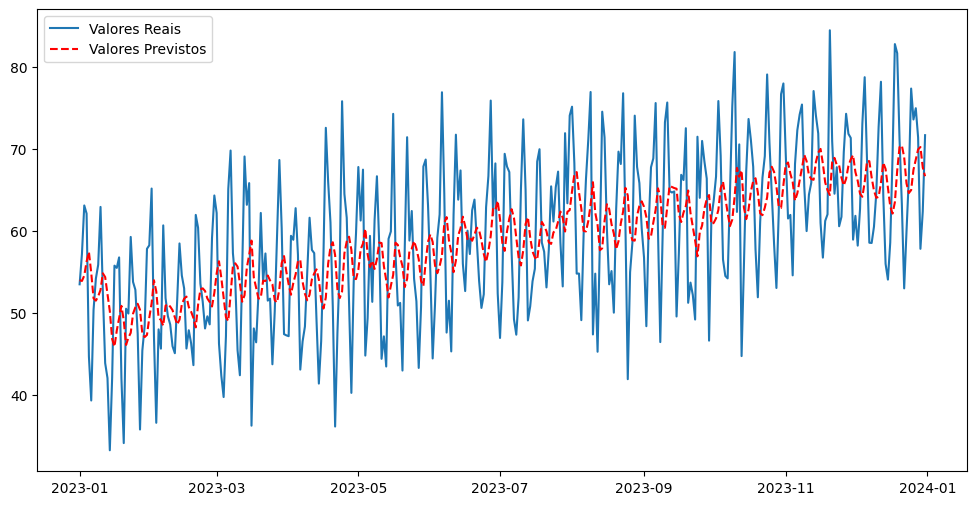

In [46]:
# plot

plt.figure(figsize = (12,6))
plt.plot(serie_temporal, label = 'Valores Reais')
plt.plot(suavizacao_exponencial, label = 'Valores Previstos', linestyle = '--', color = 'red')
plt.legend()

# Deploy e Previsão com o modelo treinado

In [49]:
# Fazer previsão
num_previsoes = 1
previsoes = modelo_ajustado.forecast(steps = num_previsoes) #Forecast = passos para o futuro

In [50]:
print(f"Previsão do Total de Vendas para Janeiro/24: {round(previsoes[0],4)}")

Previsão do Total de Vendas para Janeiro/24: 67.6499
